# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

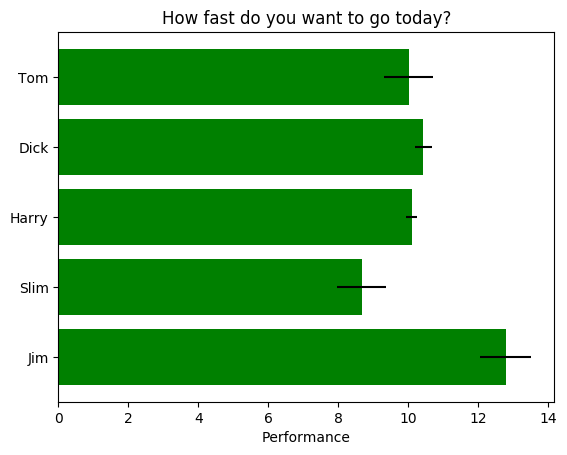

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

# ----------------------------------------- #

# Plot below here
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

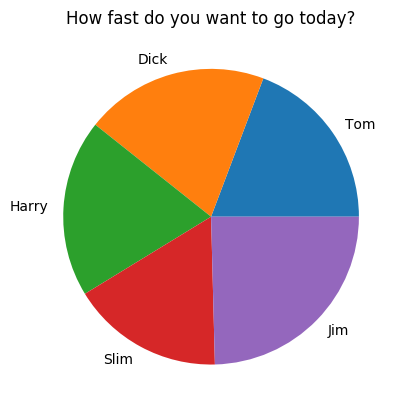

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots(1,1)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

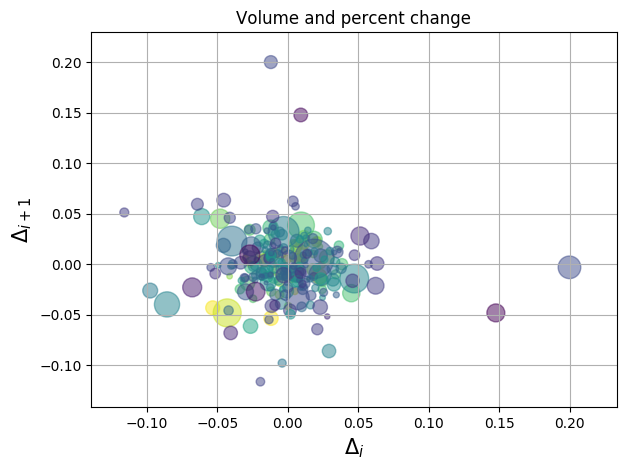

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

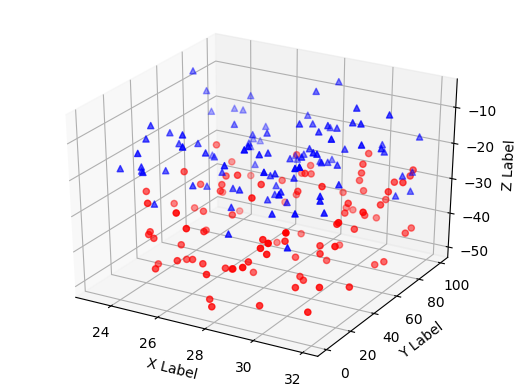

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data',na_values = ['?'], header = None, names=['Class','Age','Sex','Steroid','Antivirals',
                                                                                                                      'Fatigue','Malaise','Anorexia','Liver_Big','Liver_Firm',
                                                                                                                      'Spleen_Palpable','Spiders','Ascites','Varices','Bilrubin',
                                                                                                                      'Alk_Phosphate','SGOT','Albumin','Protime','Histology'])
print(df.shape)
df.head()

(155, 20)


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilrubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


Attribute Information:

- Class: DIE, LIVE
- AGE: 10, 20, 30, 40, 50, 60, 70, 80
- SEX: male, female
- STEROID: no, yes
- ANTIVIRALS: no, yes
- FATIGUE: no, yes
- MALAISE: no, yes
- ANOREXIA: no, yes
- LIVER BIG: no, yes
- LIVER FIRM: no, yes
- SPLEEN PALPABLE: no, yes
- SPIDERS: no, yes
- ASCITES: no, yes
- VARICES: no, yes
- BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- see the note below
- ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
- SGOT: 13, 100, 200, 300, 400, 500,
- ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
- PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
- HISTOLOGY: no, yes

In [0]:
import numpy as np
from statistics import mode

def fill_na():
  
  df.Albumin = df.Albumin.fillna(np.mean(df.Albumin))
  df.Alk_Phosphate = df.Alk_Phosphate.fillna(mode(df.Alk_Phosphate))
  df.SGOT = df.SGOT.fillna(mode(df.Alk_Phosphate))
  df.Bilrubin = df.Bilrubin.fillna(np.mean(df.Bilrubin))
  df.Protime = df.Protime.fillna(float(60))
  
fill_na()
df = df.dropna()
print(df.shape)
df.isnull().sum()

(142, 20)


Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver_Big          0
Liver_Firm         0
Spleen_Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilrubin           0
Alk_Phosphate      0
SGOT               0
Albumin            0
Protime            0
Histology          0
dtype: int64

In [0]:
print(df.shape)
df.head()

(142, 20)


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilrubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,60.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,60.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,60.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,60.0,1
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1


In [0]:
import matplotlib.pyplot as plt

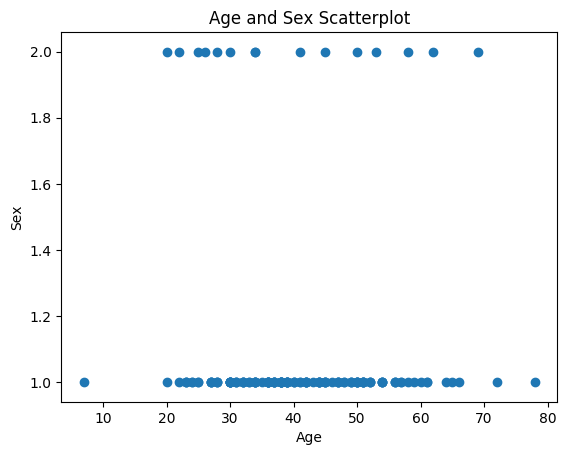

In [0]:
plt.scatter(df['Age'],df['Sex'])

# set axises
plt.xlabel("Age")
plt.ylabel("Sex")
plt.title("Age and Sex Scatterplot")

mynumber = 10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6d8c678d0>,
      dtype=object)

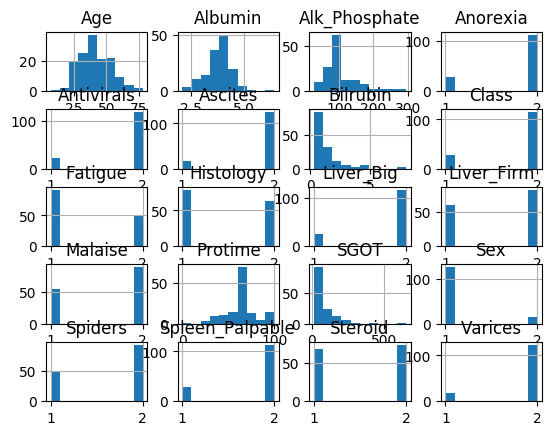

In [0]:
df.hist()

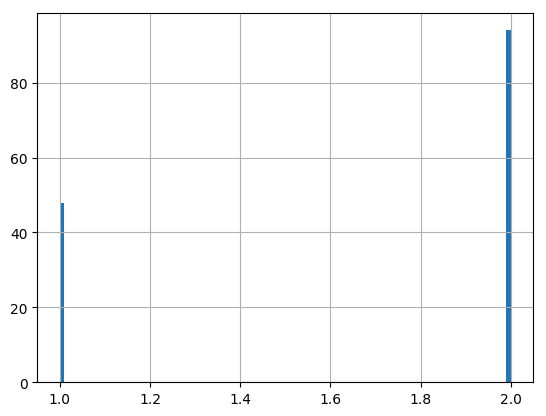

In [0]:
df['Spiders'].hist(bins=100)

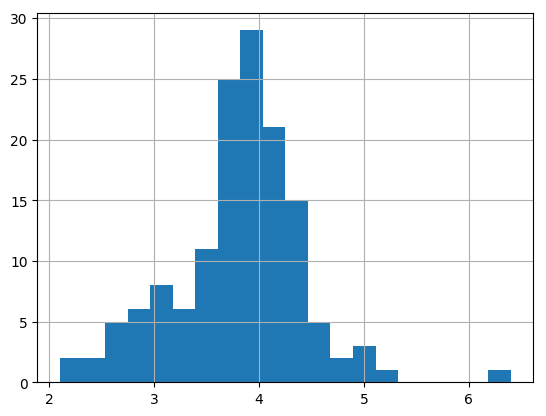

In [0]:
df['Albumin'].hist(bins=20)

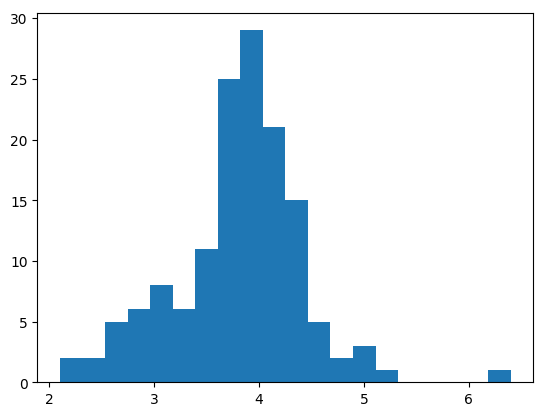

In [0]:
plt.hist(df['Albumin'], bins=20)
plt.show()

In [0]:
import seaborn as sns

# my_graph = sns.pairplot(df)

In [0]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

# output_notebook()

In [0]:
# Here is a list of categorical values (or factors)
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']

# Set the x_range to the list of categories above
p = figure(x_range=fruits, plot_height=250, title="Fruit Counts")

# Categorical values can also be used as coordinates
p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [0]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, plot_height=250, y_range=(0, 9), title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more

In [0]:
import numpy as np

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [0]:
Arrhythmia = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
Arrhythmia.head()
# I'm going to clean up the first few columns because they pertain to age, sex, height, weight
# Make a graph or two out of these colomns 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,5

In [0]:
Arrhythmia = Arrhythmia.rename({0:'Age', 1:'Sex', 2:'Height', 3:'Weight'}, axis='columns')
sex = pd.get_dummies(Arrhythmia['Sex']).head()
sex = sex.rename({0:'Male', 1:'Female'}, axis='columns')
Arrhythmia = Arrhythmia.join(sex)
Arrhythmia.head()


,Age,Sex,Height,Weight,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,Male,Female
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8,1.0,0.0
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6,0.0,1.0
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10,1.0,0.0
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,

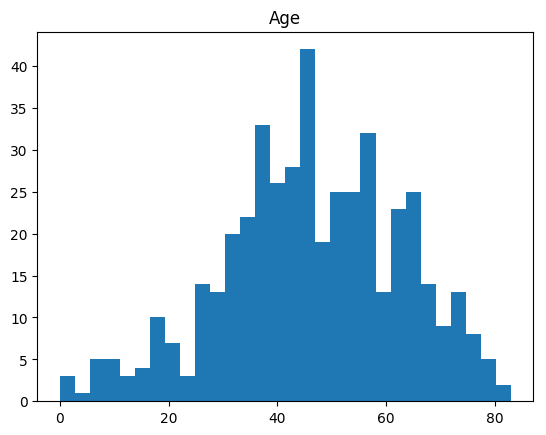

In [0]:
plt.hist(Arrhythmia['Age'], bins=30);
plt.title('Age')
plt.show()

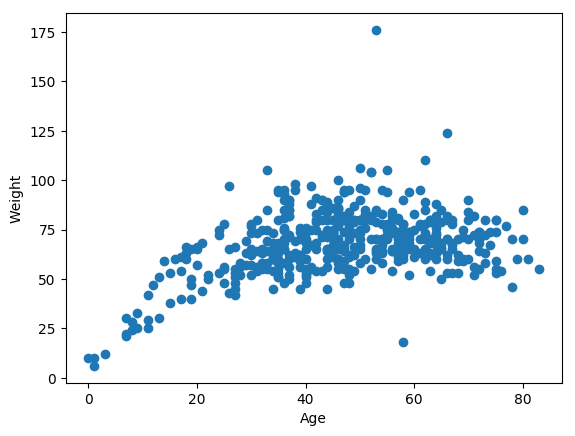

In [0]:
plt.scatter(Arrhythmia.Age, Arrhythmia.Weight)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [0]:
Adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=['Age','Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-status', 'occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
                                                                                                                     'Capital-loss', 'hours-per-week', 'native-country', 'income'] )
Adult.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [0]:
# !pip install seaborn==0.9.0
import seaborn as sns
Adult.shape

(32561, 15)

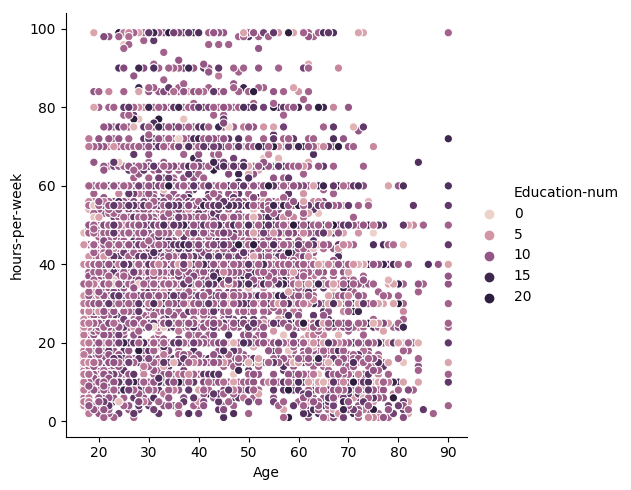

In [0]:
sns.relplot(x="Age", y="hours-per-week", hue="Education-num", data=Adult);
